# 期末实践报告: Python 雷达图绘制及其实实践操作

> 北京工商大学 2022 年 Python 数据分析及可视化基础  
> 史胤隆 张依彤 2022 年 12 月


我们选定了雷达图进行数据分析实验。我们确定的实验目标如下：

- 了解雷达图的基本概念和使用场景
- 使用 Python 生成适于雷达图的随机数据
- 使用 pathlib 绘制雷达图
- 拓展：使用更专业的第三方库绘制雷达图
- 拓展：将雷达图的绘制封装为泛用性函数，方便后续使用


## 实验准备

实验前，我们需要准备相关的环境。以下是需要安装的 Python 库和对应的安装指令 (Windows)，将在实验中持续更新：

- numpy
- pandas
- pathlib (内置模块)


In [ ]:
pip install -U numpy
pip install -U pandas


## 实验过程

### 一、了解雷达图的基本概念和使用场景

略，关键词：雷达图、极坐标、数据可视化，面积感，数据对等，无序。


### 二、使用 Python 生成适于雷达图的随机数据

根据雷达图的属性，我们计划生成一个存储了张三、李四、王五三名同学语文、数学、英语、物理、化学、生物、政治、历史、地理九门课程成绩的 Excel 文件。如此做，我们可以：

- 加强对 pathlib.`Path` 类的理解
- 掌握 pandas.`DataFrame` 类的基本使用方法
- 掌握 numpy 随机数的基本使用方法
- 掌握 Excel 文件的基本读写方法

我们使用 pandas 生成这个文件，代码如下：


In [3]:
"""
使用 Python 生成适于雷达图的随机数据
------------------------------------------------------------
这里生成随机数据并保存在 Excel 文件中, 用于后续的数据分析
"""

import numpy as np
import pandas as pd
from pathlib import Path

NAMES = ['张三', '李四', '王五']
COURSES = ['语文', '数学', '英语', '物理', '化学', '生物', '政治', '历史', '地理']
LIMIT = [60, 100]


def generate():
    """生成数据并存入 Excel 文件"""
    dir = Path('.').parent
    data = np.random.randint(LIMIT[0], LIMIT[1], (len(NAMES), len(COURSES)))
    df = pd.DataFrame(data, index=NAMES, columns=COURSES)
    df.to_excel(dir / 'data.xlsx')
    print('数据生成成功!')


if __name__ == '__main__':
    generate()


数据生成成功!


### 三、使用 pathlib 绘制雷达图

常见的使用 pathlib 绘制雷达图的方法是使用极坐标折线图绘制闭合折线，然后使用 plt.`fill` 方法填充闭合区域。

该方法得到的图像背景线呈现圆形，随不够美观，但实现起来较为简单，也应用了课内的知识点。

代码如下：


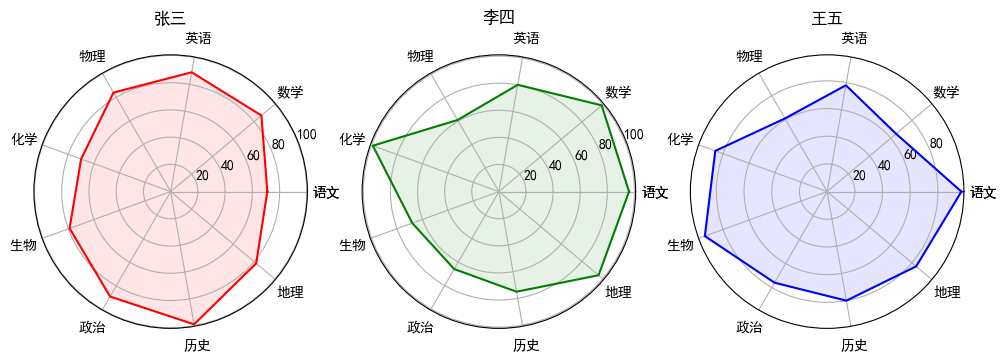

In [44]:
"""
使用 pathlib 绘制雷达图
------------------------------------------------------------
这里读取上一段生成的 Excel 文件, 并绘制雷达图
"""

import matplotlib.pyplot as plt
from pathlib import Path
from math import pi

dir = Path('.').parent                      # 获取当前位置
df = pd.read_excel(dir / 'data.xlsx')       # 读取 Data.xlsx 文件
names = df.iloc[:, 0].values                # 读取第一列作为子图标题
labels = df.columns[1:].values              # 读取第一行作为雷达图的标签
data = df.iloc[:, 1:].values                # 读取数据
plt.figure(figsize=(12, 4), dpi=100)        # 设置画布大小和分辨率
plt.rcParams['font.sans-serif'] = ['SimHei']    # 解决中文显示问题
theta = [j * 2 * pi / 9 for j in range(10)]     # 设置雷达图的角度集 (0, 40, 80, ..., 360)
lab = labels.tolist() + [labels[0]]             # 设置雷达图的标签集
colors = ['r', 'g', 'b']                        # 设置子图的颜色集
for i in range(3):
    plt.subplot(1, 3, i + 1, polar=True)    # 设置子图
    rhos = list(data[i]) + [data[i][0]]     # 设置雷达图的半径集
    plt.plot(theta, rhos, color=colors[i])  # 绘制雷达图
    plt.title(names[i])                     # 设置子图标题
    plt.xticks(theta, lab)                  # 替代极坐标
    plt.fill(theta, rhos, alpha=0.1, color=colors[i])   # 填充雷达图
plt.show()                                  # 显示图像


### 四、使用更专业的第三方库绘制雷达图


### 五、将雷达图的绘制封装为泛用性函数，方便后续使用


## 实验总结
